In [1]:
import numpy as np

dataset = np.load('proyecto_training_data.npy')

print(dataset[0,])


[2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]


## LA VARIABLE CON MAYOR PODER PREDICTIVO DEL PROYECTO DEL CURSO PASADO:
---

#       1.  OverallQual

In [2]:
y = dataset[:,0:1]
x = dataset[:,1:2]
print(y[0,])
print(x[0,])

filas, columnas = y.shape

print(filas)
print(columnas)

np.savetxt("foo.csv", dataset[:,0:2], delimiter=",")



[208500.]
[7.]
1460
1


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime


In [4]:
%load_ext tensorboard

In [ ]:
#%reload_ext tensorboard
#rm -rf graphs2/

In [5]:
#@tf.function
def h(m,b,x):    
  #y = m*tf.cast(x, tf.float64) + b
  y = m*x + b
  return y

#@tf.function
def costo(y_real,y_aprox):
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox))

In [6]:
def evolucion(x, y, yhat):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica

    ax.grid()
    ax.scatter(x,y,color="b")
    ax.plot(x,yhat,label="yhat")

    ax.legend()
    ax.set_xlabel('datos X')
    ax.set_ylabel('datos Y')
    ax.set_title('Grafica de y = mx + b')

    plt.show()

In [27]:
def regresion(x, y, lr, epochs, batch_size, tamaño_muestra, graficas):

    ########### hyper-parametros
    #lr = 0.045
    #epochs = 2000
    #batch_size = filas
    #tamaño_muestra = filas

    ########### 

    ########### parametros entrenables
    m = tf.Variable(0.0)
    b = tf.Variable(0.0)
    ###########

    errores = [] # almacenara el error de cada iteracion

    #total_iteraciones = 1
    total_iteraciones = int(tamaño_muestra/batch_size)

   
    logdir = "graphs3/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "_lr_" + str(lr) + "_epochs_" +  str(epochs) + "_bsize_" + str(batch_size)

    writer = tf.summary.create_file_writer(logdir)
    
   
    #tf.summary.trace_on(graph=True, profiler=True)


    for epoch in range(epochs):
      #shuffle(x,y) # buena practica (ordenar aleatoriamente)

        for i in range(total_iteraciones):  #muchas iteraciones por epoch 
           
          muestra_inicio = i*batch_size
          muestra_fin = muestra_inicio + batch_size
          x_mb, y_mb =  np.array(x[muestra_inicio:muestra_fin]).reshape([-1,1]), np.array(y[muestra_inicio:muestra_fin]).reshape([-1,1])

          with tf.GradientTape() as grad_tape:
            grad_tape.watch(b)
            grad_tape.watch(m)

            y_pred = h(m,b,x_mb)
            error = costo(y_mb,y_pred)

          # calcular el gradiente de la funcion de costo respecto de los parametros
          grad_m,grad_b = grad_tape.gradient(error,[m,b])

          # actualizar los parametros dando un paso en direccion contraria al gradiente
          m.assign(m - lr*grad_m)
          b.assign(b - lr*grad_b)

          # almacenar o procesar cualquier informacion relevante
          errores.append(error.numpy())

          with writer.as_default():
              tf.summary.scalar("MSE",error,step=epoch*(i+1))
            
              #tf.summary.scalar("Epoch",epoch,step=epoch*(i+1))
              #merged = tf.summary.merge_all()
            
              #tf.summary.graph(tf.summary.get_default_graph())
              
               #writer.close()

          #print("Iteracion {}, Epoch {}, , error:{}".format(i, epoch, error))
          #print("    modelo:y={}x+{}".format(m.numpy(),b.numpy()))

    
    
    #with writer.as_default():
    #  tf.summary.trace_export(
    #  name="trace",
    #  step=0,
    # profiler_outdir=logdir)
    
    writer.flush()
    
    #print("fin")
    
    if graficas==1:
        print("Modelo Ganador")
        plt.plot(errores)
        plt.show()
        evolucion(x, y, y_pred)
    
    return "error: {} output:y={}x+{}".format(error,m.numpy(),b.numpy())
    
    

In [42]:
%reload_ext tensorboard

In [10]:
#tf.summary.trace_off()


# Parametros
### lr, epochs, batch_size, muestras

# Descripción: 
---
### El proyecto utiliza el algoritmo MINI BATCH GRADIENT DESCENT 
### Se agregar un summary.scalar para monitorear el MSE del modelo
### Se utiliza la data del proyecto final del curso pasado, la variable de mayor correlación
# OverallQual

## Se define un string de configuración y se crea una carpeta para cada experimento, de la siguiente forma:

---

### Fecha_Hora_LR_Epoch_BatchSize

---


## A continuación los 10 experimentos ...




In [16]:
#print(regresion(0.0045, 5, 1200, 1200))

In [28]:
#experimento1:
print(regresion(x, y, 0.0001, 10, 300, 1200, 0))
#experimento2:
print(regresion(x, y, 0.0002, 100, 300, 1200, 0))

#experimento3:
print(regresion(x, y, 0.001, 100, 300, 1200, 0))

#experimento4:
print(regresion(x, y, 0.01, 100, 300, 1200, 0))

#experimento5:
print(regresion(x, y, 0.02, 100, 300, 1200, 0))

#experimento6:
print(regresion(x, y, 0.1, 100, 300, 1200, 0))

#experimento7:
print(regresion(x, y, 0.5, 100, 300, 1200, 0))

#experimento8:
print(regresion(x, y, 0.045, 100, 300, 1200, 0))

#experimento9:
print(regresion(x, y, 0.045, 300, 1200, 1200, 0))

#experimento10:
print(regresion(x, y, 0.0045, 500, 1200, 1200, 0))


error: 13916512256.0 output:y=4428.02783203125x+670.1323852539062
error: 1464912256.0 output:y=28655.619140625x+4058.592529296875
error: 1453233920.0 output:y=30087.392578125x+2651.056396484375
error: 1392622976.0 output:y=32588.15234375x+-13710.65234375
error: 1352451328.0 output:y=34782.74609375x+-28933.859375
error: nan output:y=nanx+nan
error: nan output:y=nanx+nan
error: 1471952512.0 output:y=36510.90234375x+-56326.3125
error: 1314044544.0 output:y=37596.08984375x+-45468.01953125
error: 1458222592.0 output:y=31452.67578125x+-6086.052734375


In [29]:
#Modelo Ganador:
print(regresion(x, y, 0.0045, 500, filas, filas, 0))

error: 1381020544.0 output:y=31293.875x+-5628.89892578125


In [30]:
%tensorboard --logdir "graphs3/"

Reusing TensorBoard on port 6006 (pid 8904), started 10:27:01 ago. (Use '!kill 8904' to kill it.)

### En esta imagen se observa el MSE de todos los experimentos

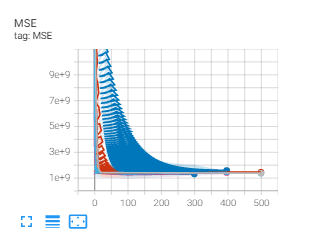


### En esta imagen se observa el string de configuración que contiene fecha y hora, además de los hiperparámetros

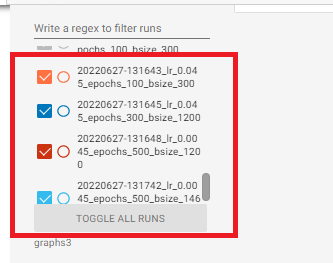


### Mejor modelo

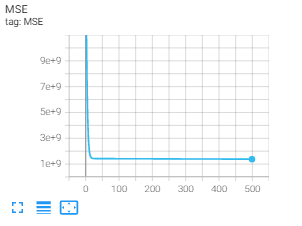




# HIPÓTESIS

La hipótesis es que mediante una regresión lineal y utilizando la variable de mayor correlación, encontraremos los parámetros que hacen que el error tienda a cero y entonces podamos predecir los precios de casas si nos dan la variable OverallQual


# CONCLUSIÓN

Después de correr varios modelos con diferentes parámetros y sin utilizar ningún optimizador, se llega a la conclusión que el error es grande pero efectivamente puede predecir [con error] los precios de las casas dados los valores de OverallQual



